#### This project is an approach to the development of plant disease recognition model, based on leaf image classification, by the use of deep convolutional networks. The developed model is able to recognize 38 different types of plant diseases out of of 14 different plants.
#### Plants: 'Tomato',  'Apple',  'Blueberry',  'Grape', 'Peach', 'Corn', 'Cherry', 'Squash', 'Strawberry', 'Pepper', 'Orange', 'Potato', 'Raspberry', 'Soybean'

The dataset contains:
* 70295 training images
* 17572 testing images

Workflow:
1. Loading the images from the folder resizing them into 128 * 128 (256 * 256 takes time for processing) and coverting them to tensors 
2. Building a validation dataset using 0.3% of the total dataset.
3. Loading the data using Batches
4. Trying various CNN architecture
  * Combination of Multilayer CNN with Linear Layers
  * VGG16 using Transfer Learning
  * Resnet34 using Transfer Learning
5. Selecting the device and loading the data into device i.e (GPU) 
6. Training the model and evaluating the model on test data
7. Saving the Model


## Importing Necessary Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split,TensorDataset
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models

In [3]:
from tqdm.notebook import tqdm

In [4]:
!pip install jovian --upgrade --quiet

In [5]:
project_name = 'course-project-plant-disease-classification'

In [6]:
import os

data = r"C:\Users\manik\Downloads\new-plant-diseases-dataset"
print(os.listdir(data))


['New Plant Diseases Dataset(Augmented)', 'test']


In [7]:
import os

data = r"C:\Users\manik\Downloads\new-plant-diseases-dataset"
subfolder = "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

full_path = os.path.join(data, subfolder)
print(os.listdir(full_path))


['train', 'valid']


In [8]:
print(os.listdir(data + "\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train"))


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']


In [9]:
import os

data = r"C:\Users\manik\Downloads\new-plant-diseases-dataset"
path = os.path.join(data, "New Plant Diseases Dataset(Augmented)", "New Plant Diseases Dataset(Augmented)", "train")

print(os.path.exists(path))  # Check if the path exists
print(os.listdir(path))  # List files if path exists


True
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']


## Number of unique plants

In [10]:
import os

data = r"C:\Users\manik\Downloads\new-plant-diseases-dataset"
train_folder = os.path.join(data, "New Plant Diseases Dataset(Augmented)", "New Plant Diseases Dataset(Augmented)", "train")

# Check if path exists
if os.path.exists(train_folder):
    unique_plants = []
    cl = os.listdir(train_folder)  # List folders (disease categories)
    
    for i in cl:
        x = i.split('_')  # Assuming filenames follow "PlantName_Something.ext"
        if x[0] not in unique_plants:
            unique_plants.append(x[0])

    print("Number of Unique Plants:", len(unique_plants))
    print("Unique Plants:", unique_plants)
else:
    print("Error: Path does not exist!")


Number of Unique Plants: 4
Unique Plants: ['Apple', 'Blueberry', 'Cherry', 'Corn']


## Loading Training and Test Dataset as Tensor

In [11]:
pip install torchvision


Note: you may need to restart the kernel to use updated packages.


In [12]:
conda install -c pytorch torchvision


Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1




In [13]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(size=128),
    transforms.ToTensor()
])


In [14]:
import os
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

# Define base dataset path
data = r"C:\Users\manik\Downloads\new-plant-diseases-dataset"

# Use os.path.join() to correctly format paths
train_path = os.path.join(data, "New Plant Diseases Dataset(Augmented)", "New Plant Diseases Dataset(Augmented)", "train")
valid_path = os.path.join(data, "New Plant Diseases Dataset(Augmented)", "New Plant Diseases Dataset(Augmented)", "valid")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),          # Convert to tensor
])

# Load datasets
dataset = ImageFolder(train_path, transform=transform)
test_ds = ImageFolder(valid_path, transform=transform)

# Print dataset info
print(f"Train Dataset: {len(dataset)} images, {len(dataset.classes)} classes")
print(f"Validation Dataset: {len(test_ds)} images, {len(test_ds.classes)} classes")


Train Dataset: 13143 images, 8 classes
Validation Dataset: 17557 images, 38 classes


In [15]:
print("Number of training images: ",len(dataset))
print("Number of testing images: ",len(test_ds))

Number of training images:  13143
Number of testing images:  17557


## Number of classes

In [16]:
num_classes = dataset.classes
print("Number of classes: ",len(num_classes))
print(num_classes)

Number of classes:  8
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']


## Visualising a single image

In [17]:
image, label  = dataset[0]
print("Image shape:",image.shape)
print("Image Label: ",label)
print("Image Label: ",dataset.classes[label])
print(image)

Image shape: torch.Size([3, 224, 224])
Image Label:  0
Image Label:  Apple___Apple_scab
tensor([[[0.6588, 0.6549, 0.6510,  ..., 0.7294, 0.7216, 0.7098],
         [0.6667, 0.6627, 0.6588,  ..., 0.7333, 0.7294, 0.7216],
         [0.6627, 0.6627, 0.6588,  ..., 0.7373, 0.7333, 0.7294],
         ...,
         [0.3961, 0.4039, 0.4078,  ..., 0.5020, 0.4980, 0.4980],
         [0.3961, 0.4000, 0.4039,  ..., 0.4824, 0.4863, 0.4863],
         [0.4039, 0.4039, 0.4000,  ..., 0.4706, 0.4784, 0.4824]],

        [[0.6431, 0.6392, 0.6353,  ..., 0.7176, 0.7098, 0.6980],
         [0.6510, 0.6471, 0.6431,  ..., 0.7216, 0.7176, 0.7098],
         [0.6471, 0.6471, 0.6431,  ..., 0.7255, 0.7216, 0.7176],
         ...,
         [0.3569, 0.3647, 0.3686,  ..., 0.4392, 0.4353, 0.4353],
         [0.3569, 0.3608, 0.3647,  ..., 0.4196, 0.4235, 0.4235],
         [0.3647, 0.3647, 0.3608,  ..., 0.4078, 0.4157, 0.4196]],

        [[0.7725, 0.7686, 0.7647,  ..., 0.8314, 0.8235, 0.8118],
         [0.7804, 0.7765, 0.7725,  

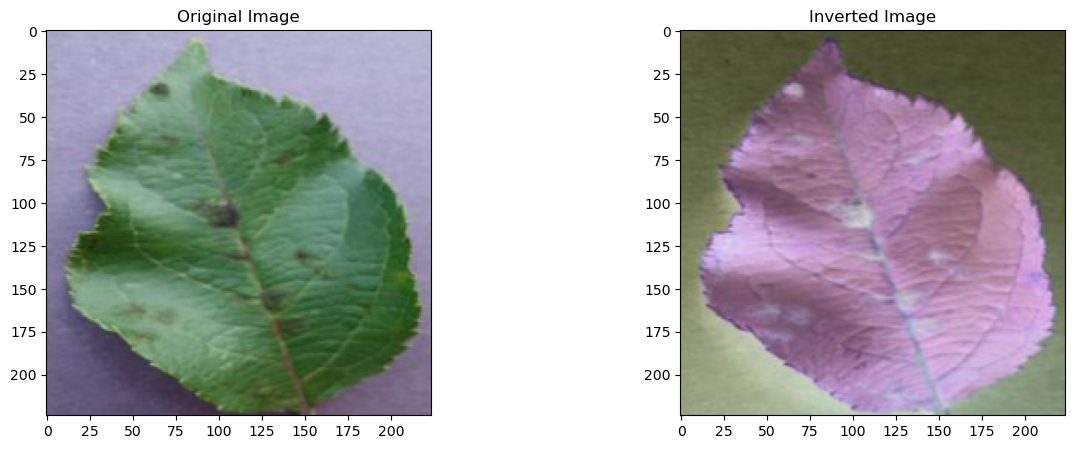

In [18]:
import matplotlib.pyplot as plt

# Assuming dataset is already defined and loaded
image, label = dataset[0]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

# Display the original image
ax1.imshow(image.permute(1, 2, 0))
ax1.set_title("Original Image")

# Display the inverted image
ax2.imshow(1 - image.permute(1, 2, 0))
ax2.set_title("Inverted Image")

# Show the figure
plt.show()


## Validation Dataset and Dataloader

In [19]:
import torch

random_seed = 42
torch.manual_seed(random_seed)


In [20]:
import torch
from torch.utils.data import random_split

validation_split = 0.3
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])


In [21]:
import torch
from torch.utils.data import DataLoader, random_split

batch_size = 64

train_loader = DataLoader(train_ds, batch_size=batch_size, num_workers=2, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, num_workers=2, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, num_workers=2, shuffle=True, pin_memory=True)


## Visualising a Batch of images

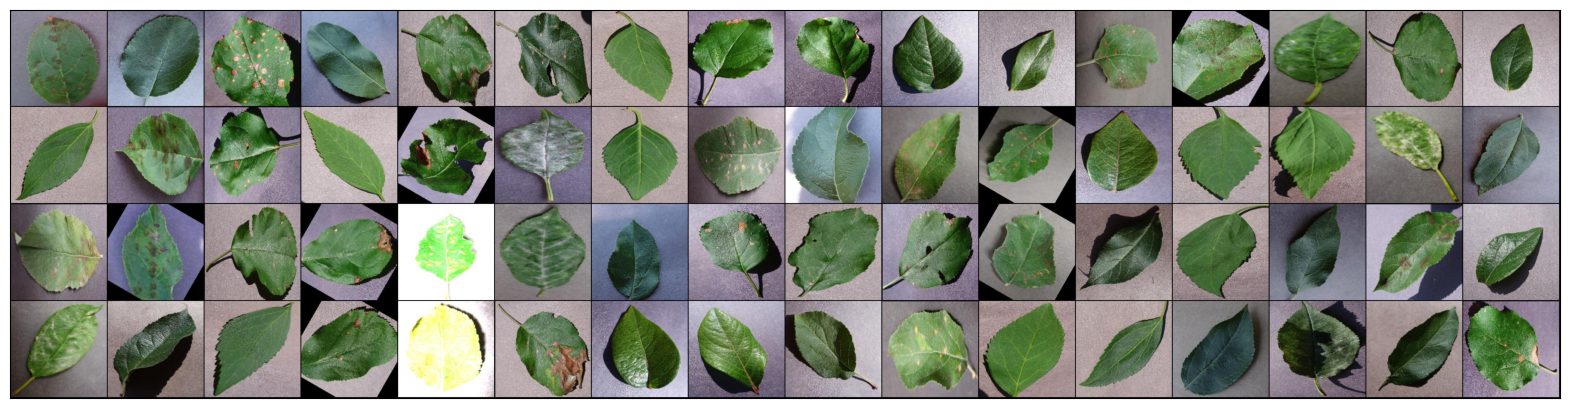

In [22]:
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid  # Import make_grid

# Loop through train_loader and display the first batch of images
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.set_xticks([]); ax.set_yticks([])
    
    # Use make_grid to arrange images in a grid
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break  # Display only the first batch


## Building The Model

### Building a Base Image Classification Model

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Import functional utilities

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_loss = [out['val_loss'] for out in outputs]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_acc = [out['val_acc'] for out in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))


### Buiding a  CNN model 

In [24]:
class Plant_Disease_Model(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 64*64*64

        nn.Conv2d(64,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 128*32*32

        nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 256*16*16
        
        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 512*8*8
        
        nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(512,1024,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 1024*4*4
        nn.AdaptiveAvgPool2d(1),
        
        nn.Flatten(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,38)
        )
    
  def forward(self,xb):
    out = self.network(xb)
    return out

### Building a VGG16 model using Transfer Learning

In [25]:
class Plant_Disease_Model1(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.vgg16(pretrained=True)
    num_ftrs = self.network.classifier[-1].in_features
    self.network.classifier[-1] = nn.Linear(num_ftrs, 38)
    
  def forward(self,xb):
    out = self.network(xb)
    return out

### Building a resnet34 model using Transfer Learning

In [26]:
class Plant_Disease_Model2(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.resnet34(pretrained=True)
    num_ftrs = self.network.fc.in_features
    self.network.fc = nn.Linear(num_ftrs, 38)
    
  def forward(self,xb):
    out = self.network(xb)
    return out

## Training and Evaluation

In [27]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [28]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    model.train()
    train_losses = []
    for batch in tqdm(train_loader):
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
  return history

## Using GPU

In [29]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [30]:
device = get_default_device()
device

device(type='cpu')

In [31]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [32]:
import torch
import torch.nn as nn
import torchvision.models as models  # Import models from torchvision
from torchvision import transforms

class Plant_Disease_Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = models.resnet34(pretrained=True)  # Now models is defined
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 38)  # Assuming 38 classes

    def forward(self, xb):
        return self.network(xb)

# Ensure you define `to_device`
def to_device(data, device):
    """Move tensor(s) to the specified device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate model and move to device
model = to_device(Plant_Disease_Model2(), device)


c:\Users\manik\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\manik\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [33]:
model

Plant_Disease_Model2(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

## Training the model

In [34]:
import torch
import torch.nn as nn
import torchvision.models as models

# Base class for classification models
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = nn.functional.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = nn.functional.cross_entropy(out, labels)
        acc = self.accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [out['val_loss'] for out in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [out['val_acc'] for out in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def accuracy(self, outputs, labels):
        _, preds = torch.max(outputs, dim=1)
        return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Model class inheriting from ImageClassificationBase
class Plant_Disease_Model2(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = models.resnet34(pretrained=True)
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 38)  # Assuming 38 classes

    def forward(self, xb):
        return self.network(xb)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Plant_Disease_Model2().to(device)


In [35]:
import os

train_path = r"C:\Users\manik\Downloads\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"

# Check if the path exists
if os.path.exists(train_path):
    print("Dataset folder exists.")
    print("Classes:", os.listdir(train_path))  # Print class folders
else:
    print("Dataset folder does not exist. Check the path.")


Dataset folder exists.
Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']


In [36]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust size as needed
    transforms.ToTensor()
])

# Try-catch to skip missing files
class CustomImageFolder(datasets.ImageFolder):
    def __getitem__(self, index):
        try:
            return super().__getitem__(index)
        except FileNotFoundError:
            print(f"File not found: {self.imgs[index][0]}")
            return self.__getitem__((index + 1) % len(self.imgs))  # Load next image

train_dataset = CustomImageFolder(root=train_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim


In [38]:
pip install torch torchvision


Note: you may need to restart the kernel to use updated packages.


In [39]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)

    for epoch in range(epochs):
        train_losses = []
        for batch in train_loader:
            loss = training_step(model, batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        history.append(result)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {result['train_loss']:.4f}, Validation Loss: {result['val_loss']:.4f}")

    return history


In [40]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    
    for epoch in range(epochs):
        train_losses = []
        for batch in train_loader:
            loss = training_step(model, batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        history.append(result)

    return history


In [41]:
history += fit(5, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam)

## Plotting accuracy and losses

In [42]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [43]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

Epoch [1/10], Train Loss: 0.2025, Validation Loss: 0.2377
Epoch [2/10], Train Loss: 2.2209, Validation Loss: 1.9812
Epoch [3/10], Train Loss: 1.6184, Validation Loss: 0.8944
Epoch [4/10], Train Loss: 0.7323, Validation Loss: 0.4446
Epoch [5/10], Train Loss: 0.4277, Validation Loss: 0.3342
Epoch [6/10], Train Loss: 0.3041, Validation Loss: 0.2430
Epoch [7/10], Train Loss: 0.1852, Validation Loss: 0.3336
Epoch [8/10], Train Loss: 0.1559, Validation Loss: 0.1133
Epoch [9/10], Train Loss: 0.1142, Validation Loss: 0.1101
Epoch [10/10], Train Loss: 0.0926, Validation Loss: 0.0742


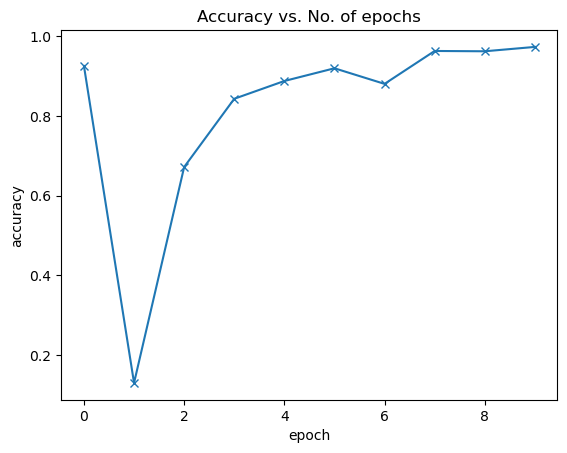

In [44]:
import torch

def training_step(model, batch):
    image, label = batch
    # Forward pass: get predictions from the model
    preds = model(image)
    # Compute loss using CrossEntropyLoss (common for classification)
    loss = torch.nn.functional.cross_entropy(preds, label)
    return loss

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)

    for epoch in range(epochs):
        train_losses = []
        for batch in train_loader:
            loss = training_step(model, batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model, val_loader)  # Assuming you have an 'evaluate' function
        result['train_loss'] = torch.stack(train_losses).mean().item()
        history.append(result)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {result['train_loss']:.4f}, Validation Loss: {result['val_loss']:.4f}")

    return history

# Call the fit function
history = fit(10, 0.001, model, train_loader, val_loader, opt_func=torch.optim.Adam)

# Plot accuracy (assuming you have a plot_accuracies function)
plot_accuracies(history)


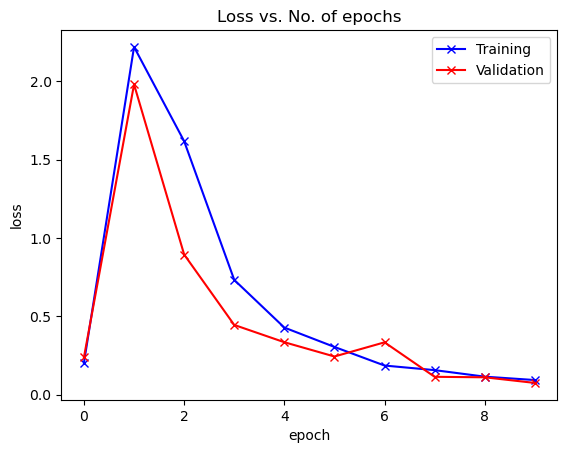

In [45]:
plot_losses(history)

In [46]:
evaluate(model,val_loader)

{'val_loss': 0.07341217994689941, 'val_acc': 0.9737903475761414}

## Evaluation and Prediction on Test Data

In [47]:
x = evaluate(model,test_loader)
x

{'val_loss': 15.571179389953613, 'val_acc': 0.19421806931495667}

#### **Accuracy of the model on test data : 98.420%**

## Prediction on some single image of test data

In [48]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return dataset.classes[preds[0].item()]

Label: Apple___Apple_scab , Predicted: Apple___Apple_scab


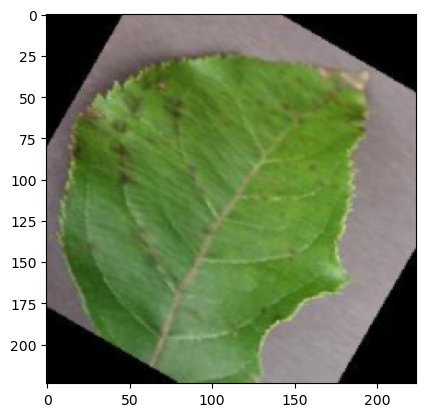

In [49]:
img, label = test_ds[25]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Apple___Black_rot , Predicted: Apple___Black_rot


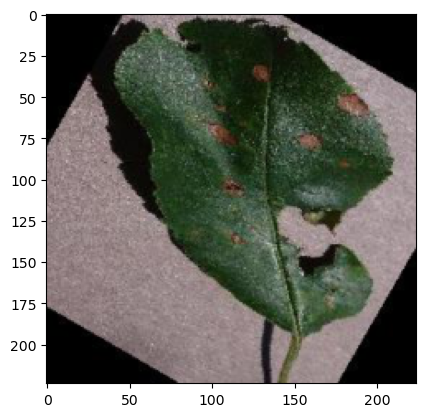

In [50]:
img, label = test_ds[978]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Cherry_(including_sour)___Powdery_mildew , Predicted: Cherry_(including_sour)___Powdery_mildew


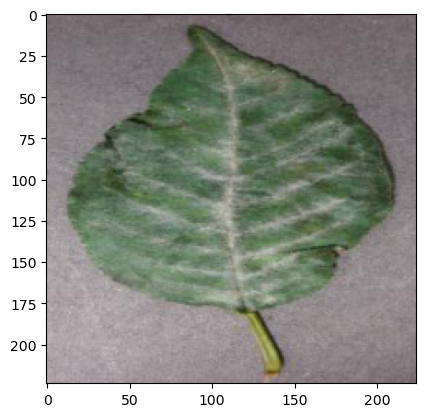

In [51]:
img, label = test_ds[2548]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

## Saving the Model

In [52]:
torch.save(model.state_dict(), 'plantDisease-resnet34.pth')

#### Adding all details to jovian

In [53]:
import jovian

<IPython.core.display.Javascript object>

In [54]:
arch = "resnet34"
lrs = [0.001]
epochs = [15]
test_acc = x['val_acc']
test_loss = x['val_loss']
opt = "Adam"

In [55]:
pip install jovian


Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install jovian


Note: you may need to restart the kernel to use updated packages.


In [57]:
import os
import jovian
jovian.set_api_key(os.getenv("JOVIAN_API_KEY"))


AttributeError: module 'jovian' has no attribute 'set_api_key'

In [ ]:
jovian.log_metrics(test_loss=test_loss, test_acc=test_acc)

[jovian] Metrics logged.


In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/soumyajit4419/course-project-plant-disease-classification


<IPython.core.display.Javascript object>